## 1. What is Natural Language Processing:

<font color="blue">
Natural Language Processing (or NLP) is applying Machine Learning models to text and language. Teaching machines to understand what is said in spoken and written word is the focus of Natural Language Processing. Whenever you dictate something into your iPhone / Android device that is then converted to text, that’s an NLP algorithm in action.

The Application with NLP:

<font color="blue">
You use NLP on a text review to predict if the review is a good one or a bad one. You can use NLP on an article to predict some categories of the articles you are trying to segment. You can use NLP on a book to predict the genre of the book. And it can go further, you can use NLP to build a machine translator or a speech recognition system, and in that last example you use classification algorithms to classify language.

## 2. Implementation of NLP:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/reviews/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
# we use delimiter="\t" in order to read tab separated data
# we use quoting=3 because there a lot of quotes that can confuse nlp algprithm
df.head(6)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0


## 2.1. Exploring the Data:

In [3]:
df.describe(include="all")

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,The food was terrible.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [4]:
df.groupby("Liked").describe() # Our data is equally distributed between liked and disliked

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [5]:
df["Length"]= df["Review"].apply(len) # Here we get the length of each review
df

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [6]:
import cufflinks as cf
cf.go_offline()
df["Length"].iplot(kind="histogram") 
# Here we get a hisgtogram of the length of the reviews

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

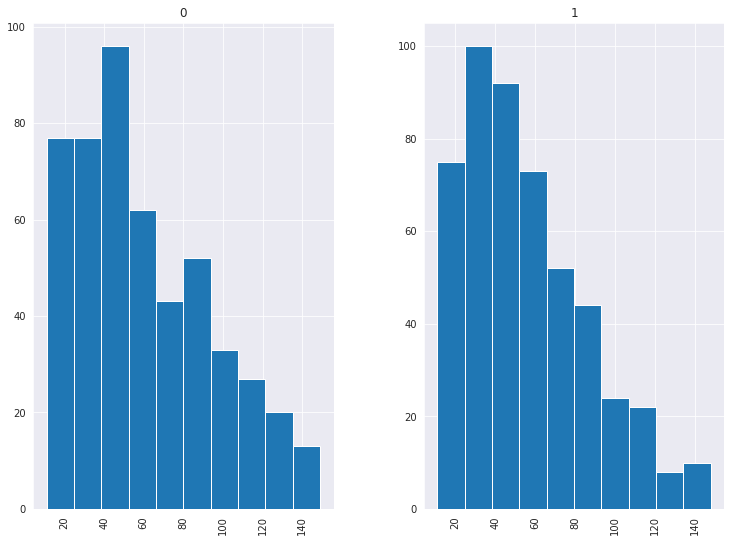

In [7]:

sns.set_style("darkgrid")
df.hist(column="Length",by="Liked",figsize=(12,9))
# We see that there is no big differences between the length of both liked and disliked reviews

In [8]:
df["Length"].max()

149

## 2.2. Cleaning the Data:

In [9]:
import re
import nltk 
from nltk.corpus import stopwords #these are the words like "the", "a" which are not meaningful
from nltk.stem.porter import PorterStemmer # this the algorithm to detect the meaning of the word from their roots
# for example loved will be transformed into love

In [10]:
corpus = list()
for i in range(0, len(df)):
    #sub(pattern, repl, string, count=0, flags=0)
    review = re.sub("[^a-zA-Z]", " ", df["Review"][i]) # we will replace all the punction by space
    # [^a-zA-Z] shows all the elements that are made by letters
    review = review.lower()
    review = review.split()
    #Next step to get the stems or roots of each word, get rid of tenses added to the words
    ps= PorterStemmer()
    all_nonstop_words = stopwords.words("english")
    all_nonstop_words.remove("not") #we need to remove not from the list of stop words
    review = [ ps.stem(word) for word in review if word not in all_nonstop_words]
    review = " ".join(review) # we reconvert every review for list into a string
    corpus.append(review)


In [11]:
print(corpus[:3]) #This is the latest version of review after data cleaning process above
#These ar ethe threes first reviews

['wow love place', 'crust not good', 'not tasti textur nasti']


In [12]:
df.head(3) #This is the original version of the three first reviews

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41


## 2.3. Creating Bag of Words:

<font color="blue">
Now we will tranform our data into vectors so that we can apply our NLP algorithm in three steps using the bag-of-words model:

4.1.Count how many times does a word occur in each message (Known as term frequency)

This represents the number of times a word appears in a document, divided by the total number of words in that document

Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
X.shape #This shows that we have 1000 reviews and 1566 different words

(1000, 1566)

In [15]:
y = df["Liked"].values # This our target
y.shape

(1000,)

## 2.4. Applying Machine Learning Algorithm:

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(800, 1566) (200, 1566)
(800,) (200,)


In [17]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train,y_train)
predictions= model1.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [18]:
predictions_df = pd.DataFrame(predictions)
original_reviews = pd.DataFrame(y_test)


In [19]:
comparison = pd.concat([predictions_df,original_reviews],axis=1,ignore_index=True)
comparison.columns = ["Predictions of Gaussian Naive Bayes Model","Original reviews"]
comparison

,Predictions of Gaussian Naive Bayes Model,Original reviews
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
195,0,0
196,1,1
197,1,1
198,1,0


In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[55 42]
 [12 91]]
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



<font color ="red">
Lets try another algorithm:

In [21]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[74 23]
 [22 81]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.78      0.79      0.78       103

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



<font color ="red">
Predicting if a single review is positive or negative:

In [23]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_X_test)
print(new_y_pred) #It is positive according to the first model

[1]


In [24]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model2.predict(new_X_test)
print(new_y_pred) #It is also positive according to the second model

[1]


In [25]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_X_test)
print(new_y_pred) # This is a negative review according to our first model

[0]


In [26]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model2.predict(new_X_test)
print(new_y_pred) # This is a negative review according to our second model

[0]


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495],
       [-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495],
       [-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495],
       ...,
       [-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495],
       [-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495],
       [-0.08692914, -0.03537746, -0.03537746, ...,  0.        ,
        -0.07088812, -0.06696495]])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
ann = Sequential()
ann.add(Dense(units=1566, activation="relu"))
ann.add(Dropout(0.1))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])


In [29]:
history=ann.fit(x= X_train, y= y_train, batch_size=32, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
25/25 [==============================] - 2s 43ms/step - loss: 0.8550 - accuracy: 0.5645 - val_loss: 1.2100 - val_accuracy: 0.5600
Epoch 2/8
25/25 [==============================] - 0s 14ms/step - loss: 0.5051 - accuracy: 0.7602 - val_loss: 0.6983 - val_accuracy: 0.7650
Epoch 3/8
25/25 [==============================] - 0s 14ms/step - loss: 0.1572 - accuracy: 0.9456 - val_loss: 0.6018 - val_accuracy: 0.7850
Epoch 4/8
25/25 [==============================] - 0s 14ms/step - loss: 0.0462 - accuracy: 0.9913 - val_loss: 0.6093 - val_accuracy: 0.8000
Epoch 5/8
25/25 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.9926 - val_loss: 0.6321 - val_accuracy: 0.7700
Epoch 6/8
25/25 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.9939 - val_loss: 0.6365 - val_accuracy: 0.7800
Epoch 7/8
25/25 [==============================] - 0s 14ms/step - loss: 0.0253 - accuracy: 0.9960 - val_loss: 0.6503 - val_accuracy: 0.7750
Epoch 8/8
25/25 [===

<AxesSubplot:>

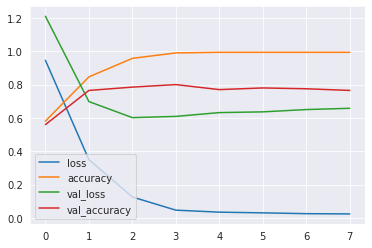

In [30]:
pd.DataFrame(ann.history.history).plot()

In [31]:
predictions3=ann.predict(X_test)
predictions_df=pd.DataFrame(predictions3, columns=["Pred"])
predictions_df.head()

,Pred
0,0.075767
1,0.069210
2,0.278203
3,0.000306
4,0.006481


In [32]:

original_reviews = pd.DataFrame(y_test)
comparison = pd.concat([predictions_df,original_reviews],axis=1,ignore_index=True)
comparison.columns = ["Predictions of Artifical Neural Networks","Original reviews"]
comparison # Artifical Neural Networks outperforms the others with %80 accuracy in test set

,Predictions of Artifical Neural Networks,Original reviews
0,0.075767,0
1,0.069210,0
2,0.278203,0
3,0.000306,0
4,0.006481,0
...,...,...
195,0.055719,0
196,0.998800,1
197,0.971890,1
198,0.024439,0


In [33]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = ann.predict(new_X_test)
print(new_y_pred) # This is a negative review according to our second model

[[0.39728662]]
